In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline  

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as stats
import math 

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
#convert column name ['date'] from object to datetime 
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
df['sqft_basement'] = df['sqft_basement'].astype(float)

#might be cool to create a function that takes any column date and converts it 

df['date'] = pd.to_datetime(df['date'])

df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [5]:
#replacing all ? with 0's - major assumption that requires data enrichment to correct
#

df['sqft_basement'] = df['sqft_basement'].map(lambda x: 0 if x==
                                             '?' else x)

df['sqft_basement'] = df['sqft_basement'].astype(float)

df['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [6]:
# Identify null values 

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#Repeat the same process for view which indicates how many times a house has been viewed

#We replaced all views with a median value, its safe to assume houses on the market in these areas are quite popular and viewed 
median = df['view'].median()
df['view'] = df['view'].fillna(value=median)#Waterfront 0 = No waterfront, 1=Waterfront 

#Making all nulls 0 indicating no waterfront 

df['waterfront'].isna().sum()

df['waterfront'] = df['waterfront'].fillna(0)


df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])

In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#dropped all duplicates for id 
#inplace = True changes the dataframe permanently

df.drop_duplicates(subset=['id'], inplace=True)

In [10]:
#drop id column
df.drop(['id'], axis=1, inplace=True)

In [11]:
df.shape

(21420, 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E20747708>,
      dtype=object)

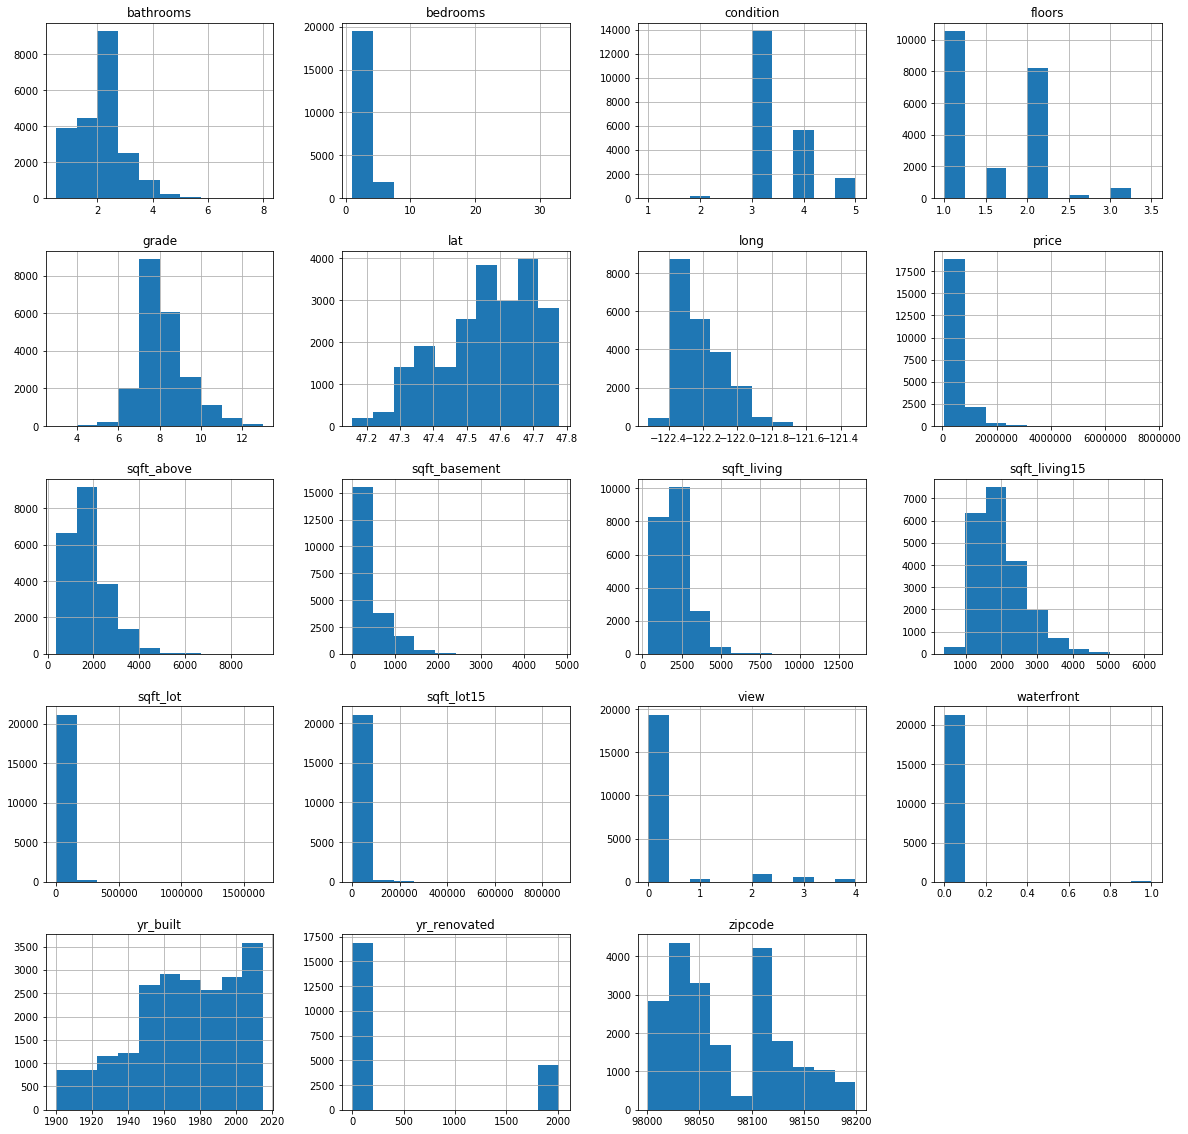

In [12]:
df.hist(figsize=(20,20))

In [73]:
#sqft_living 

indexNames = df[df['sqft_living'] >= 5000 ].index
df.drop(indexNames , inplace=True)

# sqft_above 

indexNames = df[df['sqft_above'] >= 4500 ].index
df.drop(indexNames , inplace=True)

#sqft_basement 

indexNames = df[df['sqft_basement'] >= 2000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot outliers

indexNames = df[df['sqft_lot'] >= 100000 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_living15 outliers

indexNames = df[df['sqft_living15'] >= 4500 ].index
df.drop(indexNames , inplace=True)

# dropping sqft_lot15 outliers

indexNames = df[df['sqft_lot15'] >= 100000 ].index
df.drop(indexNames , inplace=True)


# dropping grade outliers
indexNames = df[df['grade'] == 3 ].index
df.drop(indexNames , inplace=True)

indexNames = df[df['grade'] == 13 ].index
df.drop(indexNames , inplace=True)

# dropping bedroom outliers over 8 rooms
indexNames = df[df['bedrooms'] >= 8 ].index
df.drop(indexNames , inplace=True)

#dropped prices over a mill 
indexNames = df[df['price'] >= 1000000].index
df.drop(indexNames, inplace=True)

In [74]:
corr = df.corr()

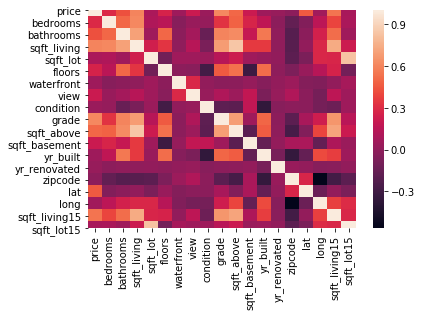

In [75]:
sns.heatmap(corr)

In [21]:
df_num = df[['price', 'bedrooms', 'bathrooms','floors', 'sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']].copy()

In [22]:
#created a logged numerical df 
df_sqft_logs = pd.DataFrame([])
df_sqft_logs = df_num

In [23]:
df_sqft_logs['sqft_living_log'] = np.log(df_sqft_logs['sqft_living'])
df_sqft_logs['sqft_above_log'] = np.log(df_sqft_logs['sqft_above'])
df_sqft_logs['sqft_lot_log'] = np.log(df_sqft_logs['sqft_lot'])
df_sqft_logs['sqft_living15_log'] = np.log(df_sqft_logs['sqft_living15'])
df_sqft_logs['sqft_lot15_log'] = np.log(df_sqft_logs['sqft_lot15'])
df_sqft_logs['bathrooms'] = np.log(df_sqft_logs['bathrooms'])
df_sqft_logs['bedrooms'] = np.log(df_sqft_logs['bedrooms'])
df_sqft_logs['floors'] = np.log(df_sqft_logs['floors'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E20CC2B88>,
      dtype=object)

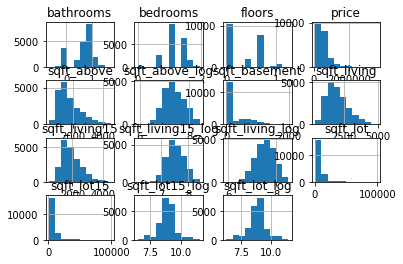

In [24]:
df_num.hist()

In [26]:
# OLS Regression

#It didnt seem to work!

import statsmodels.api as sm
import statsmodels.formula.api as smf

col_names = df_num.describe().columns #What does this?

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p_value ']] #creating an array of results we care about

for idx, val in enumerate(col_names):
    print('price~' + val)
    f = 'price~' + val
    model = smf.ols(formula=f, data=df_num).fit()
    X_new = pd.DataFrame({val: [df_num[val].min(), df_num[val].max()]});
    preds = model.predict(X_new)
    results.append({val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]})

    print(results[idx+1])
    print(model.summary())

price~price
{4.0381564758718014e-10, 1.0, 0.9999999999999997, 0.0, 'price'}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.392e+34
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:             4.2649e+05
No. Observations:               20568   AIC:                        -8.530e+05
Df Residuals:                   20566   BIC:                        -8.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

{0.076167584112109, 0.0, 204.5249403845112, 'sqft_basement', 462427.8411296069}
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1696.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:24:30   Log-Likelihood:            -2.8824e+05
No. Observations:               20568   AIC:                         5.765e+05
Df Residuals:                   20566   BIC:                         5.765e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

# Numerical Only Regresision

In [76]:
# Numerical Only Regression

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000,19394.000000
mean,464344.259616,3.314169,2.030435,1934.837011,9811.660204,1.471821,0.002372,0.154171,3.407703,7.493658,1674.932608,254.289058,1970.633650,410.647623,98079.377179,47.558005,-122.217229,1897.099722,9213.057286
std,194611.680215,0.865549,0.692493,728.711322,10606.555760,0.538104,0.048645,0.602896,0.645053,0.995263,692.668128,393.426251,29.213787,801.308969,53.519492,0.140594,0.139285,594.008619,9261.596249
min,78000.000000,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,311000.000000,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,98033.000000,47.462900,-122.331000,1460.000000,5000.000000
50%,430000.000000,3.000000,2.000000,1830.000000,7390.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1974.000000,0.000000,98072.000000,47.567250,-122.240000,1780.000000,7475.000000
75%,589000.000000,4.000000,2.500000,2390.000000,9990.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2050.000000,500.000000,1996.000000,0.000000,98118.000000,47.680800,-122.129000,2240.000000,9638.750000
max,999999.000000,7.000000,5.750000,4940.000000,99916.000000,3.500000,1.000000,4.000000,5.000000,11.000000,4480.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4495.000000,99316.000000


In [77]:
df_num.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'sqft_living_log', 'sqft_above_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log'],
      dtype='object')

In [78]:
outcome  = 'price'

x_cols = ['bedrooms', 'bathrooms', 'floors','sqft_living_log', 'sqft_above_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log']

In [79]:
from statsmodels.formula.api import ols

In [80]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1711.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:57:54   Log-Likelihood:            -2.8380e+05
No. Observations:               20568   AIC:                         5.676e+05
Df Residuals:                   20559   BIC:                         5.677e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.929e+06   5.24e+04    -74.953      0.000   -4.03e+06   -3.83e+06
bedrooms          -1.529e+05   7959.348    -19.212      0.000   -1.69e+05   -1.37e+05
bathrooms         -4.795e+04   7123.561     -6.731      0.000   -6.19e+04    -3.4e+04
floors             9902.0816   7535.749      1.314      0.189   -4868.585    2.47e+04
sqft_living_log    4.546e+05   1.06e+04     42.890      0.000    4.34e+05    4.75e+05
sqft_above_log    -2.449e+04   9975.294     -2.455      0.014    -4.4e+04   -4937.675
sqft_lot_log      -2.374e+04   5599.648     -4.240      0.000   -3.47e+04   -1.28e+04
sqft_living15_log  2.442e+05   8245.771     29.619      0.000    2.28e+05     2.6e+05
sqft_lot15_log    -2.401e+04   5975.677     -4.017      0.000   -3.57e+04   -1.23e+04
==============================================================================
Omnibus:                    11547.538   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           170223.737
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      16.254   Cond. No.                         578.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Dropping high p values 

In [82]:
outcome  = 'price'

x_cols = ['bedrooms', 'bathrooms','sqft_living_log', 'sqft_above_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log']

In [83]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_num).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     1955.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:57:56   Log-Likelihood:            -2.8380e+05
No. Observations:               20568   AIC:                         5.676e+05
Df Residuals:                   20560   BIC:                         5.677e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.938e+06    5.2e+04    -75.780      0.000   -4.04e+06   -3.84e+06
bedrooms          -1.537e+05   7938.441    -19.358      0.000   -1.69e+05   -1.38e+05
bathrooms         -4.551e+04   6878.264     -6.617      0.000    -5.9e+04    -3.2e+04
sqft_living_log    4.508e+05   1.02e+04     44.167      0.000    4.31e+05    4.71e+05
sqft_above_log    -1.658e+04   7955.558     -2.084      0.037   -3.22e+04    -988.617
sqft_lot_log      -2.527e+04   5477.270     -4.614      0.000    -3.6e+04   -1.45e+04
sqft_living15_log  2.441e+05   8245.357     29.605      0.000    2.28e+05     2.6e+05
sqft_lot15_log    -2.444e+04   5966.568     -4.096      0.000   -3.61e+04   -1.27e+04
==============================================================================
Omnibus:                    11539.959   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169961.729
Skew:                           2.394   Prob(JB):                         0.00
Kurtosis:                      16.244   Cond. No.                         573.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Validate the model 

In [85]:
y  = df_num['price']

X = df_num[['bedrooms', 'bathrooms','sqft_living_log', 'sqft_above_log', 'sqft_lot_log',
       'sqft_living15_log', 'sqft_lot15_log']]

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15426 5142 15426 5142


In [89]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [90]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [93]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [94]:
# Calculate Mean Squared Error (MSE)
# A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 56332652388.41013
Test Mean Squarred Error: 57346802082.47688


In [97]:
import math

math.sqrt(test_mse)

239471.92336989506

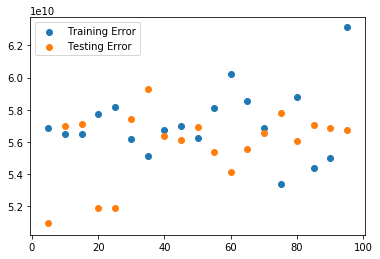

In [98]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [99]:
# Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data.


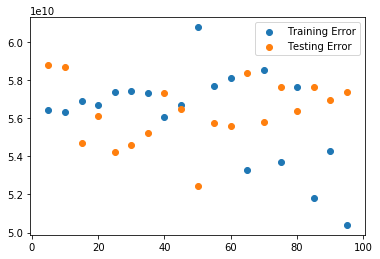

In [100]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [102]:
#Cross-Validation

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [104]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16454 4114 16454 4114


In [105]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [106]:
# Residuals and MSE 

In [107]:
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

59115588081.856804

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')

In [109]:
cv_5_results

array([-5.44252200e+10, -5.37696834e+10, -5.36919467e+10, -5.65108298e+10,
       -6.62536083e+10])